# Assignment 5
### Do all four questions.

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [129]:
A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [130]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

a_1 = A @ e_1
a_2 = A @ e_2
a_3 = A @ e_3

print("A @ e_1:", str(a_1))
print("A @ e_2:", str(a_2))
print("A @ e_3:", str(a_3))

A @ e_1: [1 4 7]
A @ e_2: [2 5 8]
A @ e_3: [3 6 9]


According to the rules of matrix multiplication, the number of columns in the first matrix must match the number of rows in the second. This condition is satisfied in all three cases because matrix A has three columns and e_1, e_2, and e_3 all each have three rows. 

Each multiplication of A@e_j creates a new vector where each entry is the dot product of a row of A and the vector e_j. Since each e_j has a single 1 in one position and 0s everywhere else, only one column of A contributes to the result. So, multiplying A by e_1 takes only the frist column of A because only the first element of each row is multiplied by 1 and the rest are multiplied by 0. 

a_1 = A @ e_1 = [1, 4, 7]
- a_1[0] = (1 * 1) + (2 * 0) + (3 * 0) = 1
- a_1[1] = (4 * 1) + (5 * 0) + (6 * 0) = 4
- a_1[2] = (7 * 1) + (8 * 0) + (9 * 0) = 7

The same process also applies to e_2 and e_3. Multiplying by e_2 isolates the second column of A, and multiplying by e_3 isolates the third column. 

a_2 = A @ e_2 = [2, 5, 8]
- a_2[0] = (1 * 0) + (2 * 1) + (3 * 0) = 2
- a_2[1] = (4 * 0) + (5 * 1) + (6 * 0) = 5
- a_2[2] = (7 * 0) + (8 * 1) + (9 * 0) = 8

a_3 = A @ e_3 = [3, 6, 9]
- a_3[0] = (1 * 0) + (2 * 0) + (3 * 1) = 3
- a_3[1] = (4 * 0) + (5 * 0) + (6 * 1) = 6
- a_3[2] = (7 * 0) + (8 * 0) + (9 * 1) = 9


b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [131]:
u = np.ones(3)
b = A @ u
print("A @ u:", str(b))

A @ u: [ 6. 15. 24.]


When multiplying the matrix A by the vector u = (1, 1, 1), a vector is created where each entry represents the sum of the corresponding row in A. This happens because I am taking the dot product of each row of A with the vector u, and since all entries in u are 1, each dot product adds up all the elements in that row. 

b = [6 15 24]
- b[0] = (1 * 1) + (2 * 1) + (3 * 1) = 6
- b[1] = (4 * 1) + (5 * 1) + (6 * 1) = 15
- b[2] = (7 * 1) + (8 * 1) + (9 * 1) = 24

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [132]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

c = A @ x
print("A @ x:", str(c))

A @ x: [-2  4 11]


When multiplying the identity matrix A by the vector x = [-2, 4, 11], the new vector is just a copy of the original vector. This happens because each row of the identity matrix contains a single 1 in a unique column with 0s everywhere else. During matrix multiplication, each row of A takes the dot product with x, selecting only one corresponding entry from x.

c = [-2 4 11]
- c[0] = (1 * -2) + (0 * 4) + (0 * 11) = -2
- c[1] = (0 * -2) + (1 * 4) + (0 * 11) = 4
- c[2] = (0 * -2) + (0 * 4) + (1 * 11) = 11

This behavior reflects the property of the identity matrix where for any vector x, I@x = x. So, each row of the identity matrix essentially chooses one entry of the vector without changing it. 

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [133]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

d = A @ x
print("A @ x:", str(d))


A @ x: [11 -2  4]


d = [11 -2 4]
- d[0] = (0 * -2) + (0 * 4) + (1 * 11) = 11
- d[1] = (1 * -2) + (0 * 4) + (0 * 11) = -2
- d[2] = (0 * -2) + (1 * 4) + (0 * 11) = 4

This matrix permutes the elements of, so the first row picks the third element of x (11), the second row picks the first element (-2), and the third row picks the second element (4). This matrix rearranges x into a new order: [x_2, x_0, x_1] = [11, -2, 4]. So even though it isn't an identity matrix, it still satisfies the condition that each row and column have exactly one 1 and sums to 1. This makes it a permutation matrix, which is a type of matrix that reorders the elements of a vector without altering their values. 

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [134]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) 
sums = np.sum(A,axis=0) 
A = A/sums
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [135]:
e_1_1 = A @ e_1
e_2_1 = A @ e_2
e_3_1 = A @ e_3

print("A @ e_1:", str(e_1_1))
print("A @ e_2:", str(e_2_1))
print("A @ e_3:", str(e_3_1))


A @ e_1: [0.50052958 0.02574731 0.47372311]
A @ e_2: [0.24049286 0.39251588 0.36699127]
A @ e_3: [0.18358131 0.37907577 0.43734292]


e_1_1 = [0.50052958 0.02574731 0.47372311]
- e_1_1[0] = (0.50052958 * 1) + (0.24049286 * 0) + (0.18358131 * 0) = 0.50052958
- e_1_1[1] = (0.02574731 * 1) + (0.39251588 * 0) + (0.37907577 * 0) = 0.02574731
- e_1_1[2] = (0.47372311 * 1) + (0.36699127 * 0) + (0.43734292 * 0) = 0.43734292

e_1_2 = [0.24049286 0.39251588 0.36699127]
- e_1_2[0] = (0.50052958 * 0) + (0.24049286 * 1) + (0.18358131 * 0) = 0.24049286
- e_1_2[1] = (0.02574731 * 0) + (0.39251588 * 1) + (0.37907577 * 0) = 0.39251588
- e_1_2[2] = (0.47372311 * 0) + (0.36699127 * 1) + (0.43734292 * 0) = 0.36699127

e_1_3 = [0.18358131 0.37907577 0.43734292]
- e_1_3[0] = (0.50052958 * 0) + (0.24049286 * 0) + (0.18358131 * 1) = 0.18358131
- e_1_3[1] = (0.02574731 * 0) + (0.39251588 * 0) + (0.37907577 * 1) = 0.37907577
- e_1_3[2] = (0.47372311 * 0) + (0.36699127 * 0) + (0.43734292 * 1) = 0.43734292

When we multiply the matrix A by the vectors e_1 = [1, 0, 0], e_2 = [0, 1, 0], and e_3 = [0, 0, 1], each product returns the first, second, and third columns of A, respectively. This happens because the multiplication selects only the columns of A that correspond to the positions where the vector has a 1. For example, A @ e_1 results in a weighted sum of the columns of A, but since only the first entry of e_1 is 1 (and the rest are 0), the result is just the first column of A. The same logic applies to A @ e_2 and A @ e_3, which return the second and third columns. Each entry in the resulting vector is a linear combination of the columns of A weighted by the entries in the input vector, and only one column is being selected at a time.

In the context of a Markov transition matrix, each column represents the distribution of transitions from a specific starting state. Therefore, multiplying 
A by e_j gives the probability distribution of moving from state j to all other states after one step.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [136]:
f_1 = A @ e_1
f_2 = A @ e_2
f_3 = A @ e_3

print("Initial f_1:", str(f_1))
print("Initial f_2:", str(f_2))
print("Initial f_3:", str(f_3))
print()

for _ in range(4):
    f_1 = A @ f_1
    f_2 = A @ f_2
    f_3 = A @ f_3

print("A @ f_1 (5 times):", str(f_1))
print("A @ f_2 (5 times):", str(f_2))
print("A @ f_3 (5 times):", str(f_3))

Initial f_1: [0.50052958 0.02574731 0.47372311]
Initial f_2: [0.24049286 0.39251588 0.36699127]
Initial f_3: [0.18358131 0.37907577 0.43734292]

A @ f_1 (5 times): [0.29266551 0.27862515 0.42870935]
A @ f_2 (5 times): [0.29197422 0.27979983 0.42822595]
A @ f_3 (5 times): [0.29171646 0.2802254  0.42805814]


I will show the process for f_1 and then f_2 and f_3 follow identical processes but with their respective numbers. 

Initial f_1 = [0.50052958, 0.02574731, 0.47372311]

f_1 (after first multiplication) = [0.29266551, 0.27862515, 0.42870935]
- f_1 (after first multiplication)[0] = (0.50052958 * 0.50052958) + (0.24049286 * 0.02574731) + (0.18358131 * 0.47372311) = 0.29266551
- f_1 (after first multiplication)[1] = (0.50052958 * 0.24049286) + (0.24049286 * 0.39251588) + (0.18358131 * 0.36699127) = 0.27862515
- f_1 (after first multiplication)[2] = (0.50052958 * 0.47372311) + (0.24049286 * 0.37907577) + (0.18358131 * 0.43734292) = 0.42870935

f_1 (after second multiplication) = [0.343688613785, 0.343688613785, 0.343688613785]
- f_1 (after second multiplication)[0] = (0.50052958 * 0.29266551) + (0.24049286 * 0.27862515) + (0.18358131 * 0.42870935) = 0.343688613785
- f_1 (after second multiplication)[1] = (0.50052958 * 0.27862515) + (0.24049286 * 0.27979983) + (0.18358131 * 0.42805814) = 0.343688613785
- f_1 (after second multiplication)[2] = (0.50052958 * 0.42870935) + (0.24049286 * 0.42822595) + (0.18358131 * 0.29171646) = 0.343688613785

f_1 (after third multiplication) = [0.343688613785, 0.343688613785, 0.343688613785]

f_1 (after fourth multiplication) = [0.343688613785, 0.343688613785, 0.343688613785]

f_1 (after fifth multiplication) = [0.343688613785, 0.343688613785, 0.343688613785]

As you can see, the values of the vectors stabilize after multiple multiplications by A, which indicates that the systems have converged. Even after the second multiplication, the vectors become practically constant and don’t change with more multiplications. This behavior happens because A is a Markov transition matrix, where each column sums to 1 and each entry represents the probability of moving between states. Multiplying a vector by A shows one step of the process. Repeated multiplication causes the system to eventually forget its initial state and stabilize. All three vectors f_1, f_2, and f_3 converge to the same steady-state vector, regardless of their different starting points.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [137]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

vector_1 = np.array([1,0])

result_1 = T @ vector_1
print("T @ vector_1:", str(result_1))

T @ vector_1: [0.25 0.75]


The vector [0.25, 0.75] represents the probabilities of being in states 1 and 2 after one step of the process, given the initial condition. So, starting in state 1, after one transition, there's a 25% chance of being in state 1 and a 75% chance of being in state 2. 

In [138]:
result_2 = T @ result_1
print("T @ result_1:", str(result_2))

T @ result_1: [0.4375 0.5625]


[0.4375, 0.5625] is the distribution of states two time steps after the initial state vector [1, 0]. So, after starting in state 1, multiplying by T once gives the distribution after 1 step and multiplying again forecasts the distribution after 2 steps. The vector represents the probability proportions of being in states 1 and 2 after two transitions. 

In [139]:
result_3 = T @ result_2
print("T @ result_2:", str(result_3))

result_4 = T @ result_3
print("T @ result_3:", str(result_4))

result_5 = T @ result_4
print("T @ result_4:", str(result_5))

result_6 = T @ result_5 
print("T @ result_5:", str(result_6))

result_7 = T @ result_6
print("T @ result_6:", str(result_7))

result_8 = T @ result_7
print("T @ result_7:", str(result_8))

result_9 = T @ result_8
print("T @ result_8:", str(result_9))

result_10 = T @ result_9
print("T @ result_9:", str(result_10))

T @ result_2: [0.390625 0.609375]
T @ result_3: [0.40234375 0.59765625]
T @ result_4: [0.39941406 0.60058594]
T @ result_5: [0.40014648 0.59985352]
T @ result_6: [0.39996338 0.60003662]
T @ result_7: [0.40000916 0.59999084]
T @ result_8: [0.39999771 0.60000229]
T @ result_9: [0.40000057 0.59999943]


When I repeatedly multiply the current state distribution vector by the transition matrix T, the vector changes less and less, eventually settling into a stable distribution. By about the 5th or 6th multiplication, the changes become very, very small, which indicates convergence. 

In [140]:
vector_2 = np.array([0,1])

result_1_v2 = T @ vector_2
print("T @ vector_2:", str(result_1_v2))

result_2_v2 = T @ result_1_v2        
print("T @ result_1_v2:", str(result_2_v2))

result_3_v2 = T @ result_2_v2
print("T @ result_2_v2:", str(result_3_v2))

result_4_v2 = T @ result_3_v2
print("T @ result_3_v2:", str(result_4_v2))

result_5_v2 = T @ result_4_v2
print("T @ result_4_v2:", str(result_5_v2))

result_6_v2 = T @ result_5_v2
print("T @ result_5_v2:", str(result_6_v2))

result_7_v2 = T @ result_6_v2
print("T @ result_6_v2:", str(result_7_v2))

result_8_v2 = T @ result_7_v2
print("T @ result_7_v2:", str(result_8_v2))

result_9_v2 = T @ result_8_v2
print("T @ result_8_v2:", str(result_9_v2))

result_10_v2 = T @ result_9_v2
print("T @ result_10_v2:", str(result_9_v2))

T @ vector_2: [0.5 0.5]
T @ result_1_v2: [0.375 0.625]
T @ result_2_v2: [0.40625 0.59375]
T @ result_3_v2: [0.3984375 0.6015625]
T @ result_4_v2: [0.40039062 0.59960938]
T @ result_5_v2: [0.39990234 0.60009766]
T @ result_6_v2: [0.40002441 0.59997559]
T @ result_7_v2: [0.3999939 0.6000061]
T @ result_8_v2: [0.40000153 0.59999847]
T @ result_10_v2: [0.40000153 0.59999847]


The new initial condition, [0, 1] means it starts entirely in state 2. After repeatedly multiplying the transition matrix T, the distribution also begins to settle into a stable state. Just like the other case starting from [1, 0], the vector converges to the same steady state distribution: [0.4, 0.6]

This confirms the property of Markov chains that states that the system always converges to the same steady-state vector regardless of the starting point. The early steps could differ based on the initial condition, but in the long run, the result is the same, which shows how the system forgets where it started and settles into a stable pattern of behavior over time.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [141]:
weather = pd.read_csv('cville_weather.csv', encoding='latin-1')
weather.head()

,§§,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",1/4/24,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",1/7/24,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",1/9/24,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",1/10/24,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",1/24/24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [142]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   §§               411 non-null    object 
 1   NAME             411 non-null    object 
 2   DATE             411 non-null    object 
 3   DAPR             12 non-null     float64
 4   DAPR_ATTRIBUTES  12 non-null     object 
 5   MDPR             12 non-null     float64
 6   MDPR_ATTRIBUTES  12 non-null     object 
 7   PRCP             399 non-null    float64
 8   PRCP_ATTRIBUTES  399 non-null    object 
 9   SNOW             223 non-null    float64
 10  SNOW_ATTRIBUTES  223 non-null    object 
 11  SNWD             1 non-null      float64
 12  SNWD_ATTRIBUTES  1 non-null      object 
dtypes: float64(5), object(8)
memory usage: 41.9+ KB


There are missing data issues. `§§`, `NAME`, and `DATE` each have no missing values, `PRCP` and `PRCP_ATTRIBUTES` are each missing very few, `SNOW` and `SNOW_ATTRIBUTES` are both missing about half, and the rest are missing almost all of their values. 

In [143]:
weather['rain'] = (weather['PRCP'] > 0).astype(int)
weather['rain'].value_counts()

rain
0    232
1    179
Name: count, dtype: int64

In [144]:
rain = weather['rain'].values
states = [0, 1]
S = len(states)
T = len(rain)
tr_counts = np.zeros((S, S))

for t in range(1, T):
    x_previous = rain[t -1]
    x_current = rain[t]
    tr_counts[x_previous, x_current] += 1

sums = tr_counts.sum(axis=1, keepdims=True)
tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where= sums!=0)

pd.DataFrame(np.round(tr_pr,3), index=states, columns=states)

,0,1
0,0.732,0.268
1,0.352,0.648


So there is a 64.8% chance it will rain again if it rained the day before. There is a 26.8% chance of rain following a clear day. 

In [ ]:
P = np.array([[0.732, 0.268], [0.352, 0.648]])

# no rain
initial_state_no_rain = np.array([1, 0])  
forecast_no_rain = []
power = P.copy()
for t in range(1, 14):
    forecast_no_rain.append(initial_state_no_rain @ power)
    power = power @ P
forecast_no_rain

[array([0.732, 0.268]),
 array([0.63016, 0.36984]),
 array([0.5914608, 0.4085392]),
 array([0.5767551, 0.4232449]),
 array([0.57116694, 0.42883306]),
 array([0.56904344, 0.43095656]),
 array([0.56823651, 0.43176349]),
 array([0.56792987, 0.43207013]),
 array([0.56781335, 0.43218665]),
 array([0.56776907, 0.43223093]),
 array([0.56775225, 0.43224775]),
 array([0.56774585, 0.43225415]),
 array([0.56774342, 0.43225658])]

The forecast stabilizes around the 7th day, so the Markov chain reaches its stationary distribution pretty quickly. Given there was no rain the day before, the system converges to a chance of about 56.7% clear and 43.2% rainy. 

In [146]:
# rain
initial_state_rain = np.array([0, 1])  
forecast_rain = []
power = P.copy()
for t in range(1, 14):
    forecast_rain.append(initial_state_rain @ power)
    power = power @ P
forecast_rain

[array([0.352, 0.648]),
 array([0.48576, 0.51424]),
 array([0.5365888, 0.4634112]),
 array([0.55590374, 0.44409626]),
 array([0.56324342, 0.43675658]),
 array([0.5660325, 0.4339675]),
 array([0.56709235, 0.43290765]),
 array([0.56749509, 0.43250491]),
 array([0.56764814, 0.43235186]),
 array([0.56770629, 0.43229371]),
 array([0.56772839, 0.43227161]),
 array([0.56773679, 0.43226321]),
 array([0.56773998, 0.43226002])]

This system also stabilizes around the 7th day. Given it was rainy the day before, the system also converges to a chance of about 56.7% clear and 43.2% rainy. 

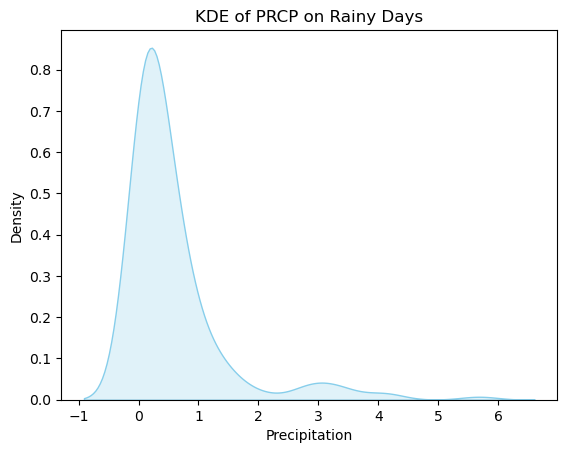

In [147]:
rainy_prcp = weather.loc[weather['rain'] == 1, 'PRCP']
sns.kdeplot(rainy_prcp, fill=True, color='skyblue')
plt.title("KDE of PRCP on Rainy Days")
plt.xlabel("Precipitation")
plt.ylabel("Density")
plt.show()

The peak of this KDE curve shows that the most common amount of precipitation on rainy days is around 0.2 inches. The distribution is relatively narrow, suggesting that most rainy days had light rain. However, the right skew indicates some variability, with a few days experiencing much heavier rain, sometimes as much as 4 to 6 inches.

One way I could improve my model is to make the Markov chain time-dependent by implementing a chain where the transition probabilities change over time, for example, by season or by month. In my current model, the transition matrix T is assumed to be constant throughout the entire time period, which implies that the probability of rain today given yesterday's weather is the same in January as it is in July. But weather patterns are very heavily skewed by seasonal factors. By allowing the transition probability to vary with time, I could model seasonality explicityly. For example, I could estimate seperate transition matrices for each month or season using historical weather data. A time-varying model would better capture typical increased rain probabilities in spring and fall, higher chances of snow or frozen percipitation in the winter, and drier summer months where rain is much less frequent. 

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [ ]:
with open ('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)
print(len(data))

1000


In [160]:
# Extract state space:
states = set(data[0])
for i in range(1, len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i)
states = list(states)
states

["Hell's Kitchen",
 'Upper East Side',
 'SoHo',
 'East Harlem',
 'Battery Park City',
 'Chelsea',
 'Outside Manhattan',
 'Roosevelt Island',
 'Upper West Side',
 'Financial District',
 'Inwood',
 'Liberty Island',
 'Stuyvesant Town',
 'Flatiron District',
 'Theater District',
 'Morningside Heights',
 'Midtown',
 'Chinatown',
 'NoHo',
 'Murray Hill',
 'Tribeca',
 'East Village',
 'Gramercy',
 'Washington Heights',
 'Nolita',
 'Little Italy',
 'Two Bridges',
 'Kips Bay',
 'Greenwich Village',
 "Randall's Island",
 'Harlem',
 'Civic Center',
 'Governors Island',
 'Lower East Side',
 'Ellis Island',
 'Central Park',
 'West Village',
 'Marble Hill']

In [161]:
# Compute transition counts:
S = len(states)
tr_counts = np.zeros((S, S))

for trip in data:
    seq = np.array(trip)
    for t in range(1, len(seq)):
        x_tm1 = seq[t - 1]
        x_t = seq[t]
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        tr_counts[index_from, index_to] += 1
print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[3.463220e+05 5.555700e+04 1.324100e+04 ... 1.452300e+04 3.476500e+04
  4.700000e+01]
 [4.910700e+04 1.283151e+06 1.425400e+04 ... 9.231900e+04 2.253800e+04
  3.400000e+01]
 [1.298500e+04 1.547600e+04 1.386320e+05 ... 1.752000e+03 4.846100e+04
  3.000000e+00]
 ...
 [1.314600e+04 7.265000e+04 2.123000e+03 ... 5.226800e+04 3.243000e+03
  5.000000e+00]
 [3.124800e+04 2.536400e+04 4.091300e+04 ... 3.028000e+03 2.424690e+05
  7.000000e+00]
 [3.700000e+01 3.700000e+01 0.000000e+00 ... 6.000000e+00 9.000000e+00
  1.600000e+01]]


In [162]:
sums = tr_counts.sum(axis = 0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[1.224325e+06 2.797713e+06 5.505970e+05 3.168490e+05 2.292330e+05
  1.978283e+06 2.363961e+06 8.010000e+03 1.803491e+06 4.415950e+05
  1.431200e+04 1.000000e+00 1.112860e+05 3.952740e+05 8.740550e+05
  1.627050e+05 3.851929e+06 1.058730e+05 1.743220e+05 6.543970e+05
  4.086400e+05 8.886440e+05 5.017430e+05 7.253000e+04 1.063770e+05
  3.859100e+04 1.038800e+04 5.077760e+05 5.102620e+05 3.603000e+03
  2.171620e+05 5.790800e+04 1.200000e+01 3.705660e+05 3.000000e+00
  3.701250e+05 8.393620e+05 4.930000e+02]]


In [150]:
state_to_index = {state: index for index, state in enumerate(states)}
index_to_state = {index: state for state, index in state_to_index.items()}
cleaned = [t.dropna().reset_index(drop=True) for t in taxi]

Transition Proportions: 

                     Hell's Kitchen  Upper East Side  SoHo  East Harlem  \
Hell's Kitchen                 0.28             0.02  0.02         0.02   
Upper East Side                0.04             0.46  0.03         0.28   
SoHo                           0.01             0.01  0.25         0.00   
East Harlem                    0.00             0.03  0.00         0.23   
Battery Park City              0.01             0.00  0.02         0.00   
Chelsea                        0.12             0.03  0.08         0.02   
Outside Manhattan              0.04             0.05  0.08         0.08   
Roosevelt Island               0.00             0.00  0.00         0.00   
Upper West Side                0.11             0.07  0.02         0.08   
Financial District             0.01             0.00  0.03         0.00   
Inwood                         0.00             0.00  0.00         0.00   
Liberty Island                 0.00             0.00  0.00         0.00   

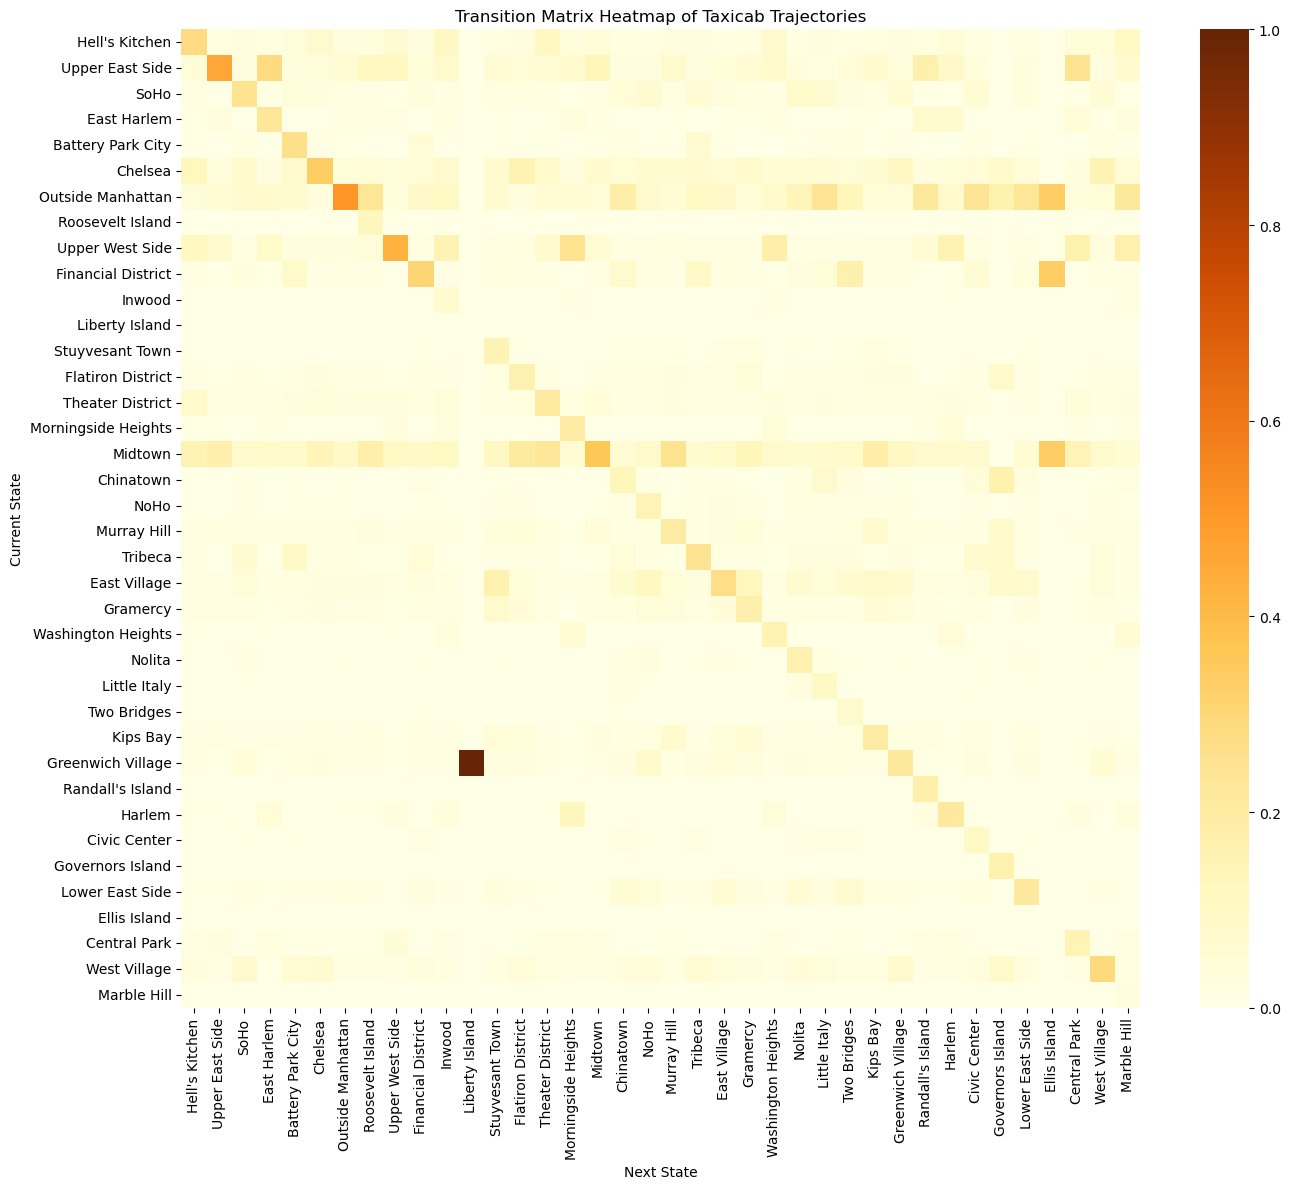

In [173]:
pd.set_option("display.max_columns", 38)
pd.set_option("display.max_rows", 38)

tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where = sums!=0)
print('Transition Proportions: \n')
tr_df = pd.DataFrame(np.round(tr_pr, 2), index = states, columns = states)
print(tr_df)

plt.figure(figsize=(14, 12))
sns.heatmap(tr_pr, xticklabels=states, yticklabels=states, cmap = 'YlOrBr')
plt.title('Transition Matrix Heatmap of Taxicab Trajectories')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

From this matrix, it appears that it is very common for taxi rides to start and end in the same neighborhood. For example, the proportion of rides that begin and end Outside Manhattan is 0.51, Upper East Side to Upper East Side is 0.46, and Upper West Side to Upper West Side is 0.42. Some common rides between different neighborhoods include Outside Manhattan to Ellis Island (0.33), Financial District to Ellis Island (0.33), Midtown to Ellis Island (0.33), Upper East Side to East Harlem (0.28), and Outside Manhattan to Little Italy (0.24).
However, I noticed that the probability that a taxi in Greenwich Village next goes to Liberty Island is 100%. This seems unlikely, as it would imply that all taxi rides to Liberty Island come from Greenwich Village. It is more probable that this is due to a lack of data like maybe there is only one recorded trip to Liberty Island in the dataset, and that trip happened to start in Greenwich Village.

Taxicabs are most likely order one because a cab’s next destination depends almost entirely on its current location, not on the history of where it has been. Once a cab is in a given neighborhood, the next trip is typically determined by a new passenger, whose destination is unrelated to where the cab came from. As a result, the past locations have very little influence on future destinations, making higher-order models unnecessary in most cases.

In [175]:
start_state = "Hell's Kitchen"
start_index = state_to_index[start_state]

# Initial distribution: start in Hell's Kitchen
p0 = np.zeros(len(states))
p0[start_index] = 1

# Compute p_n = p0 @ T^n for n = 2, 3, 5, 10
for n in [2, 3, 5, 10]:
    pn = p0 @ np.linalg.matrix_power(T, n)
    top_indices = pn.argsort()[::-1][:5]
    print(f"\nAfter {n} trips:")
    for i in top_indices:
        print(f"  {index_to_state[i]}: {pn[i]:.4f}")



After 2 trips:
  Midtown: 0.1725
  Hell's Kitchen: 0.1192
  Chelsea: 0.1087
  Upper West Side: 0.0989
  Upper East Side: 0.0869

After 3 trips:
  Midtown: 0.1726
  Upper East Side: 0.1080
  Chelsea: 0.0972
  Upper West Side: 0.0916
  Outside Manhattan: 0.0900

After 5 trips:
  Midtown: 0.1693
  Upper East Side: 0.1204
  Outside Manhattan: 0.0994
  Chelsea: 0.0881
  Upper West Side: 0.0826

After 10 trips:
  Midtown: 0.1678
  Upper East Side: 0.1220
  Outside Manhattan: 0.1028
  Chelsea: 0.0861
  Upper West Side: 0.0787


Starting from Hell's Kitchen, after 2 trips, the taxi is most likely to be found in Midtown (about 17%), followed by Hell's Kitchen itself, Chelsea, Upper West Side, and Upper East Side. These results suggest that early on, taxis tend to stay relatively close within central Manhattan neighborhoods. By 3 trips, Midtown is still the top location, but the probabilities start to spread out more, with Outside Manhattan entering the top 5. After 5 trips, the likelihood of being in Midtown is still high but gradually decreases, while the probabilities for Upper East Side and Outside Manhattan increase. By 10 trips, Midtown is still the most probable location but with a slightly lower probability, while the Upper East Side and Outside Manhattan become more prominent, reflecting the tendency of taxis to cover a wide area over multiple trips.

In [ ]:
import numpy as np

start_state = "Midtown"
start_index = state_to_index[start_state]
pi = np.zeros(len(states))
pi[start_index] = 1.0

for i in range(1000):
    new_pi = pi @ T
    if np.allclose(new_pi, pi, atol=1e-8):
        print(f"Converged after {i+1} iterations.")
        break
    pi = new_pi

steady_state = pi / pi.sum()
top_n = 10
top_indices = np.argsort(steady_state)[::-1][:top_n]

print("\nNeighborhoods where cabs spend most of their time in Manhattan:")
for index in top_indices:
    print(f"{index_to_state[index]}: {steady_state[index]:.4f}")


Converged after 20 iterations.

Neighborhoods where cabs spend most of their time in Manhattan:
Midtown: 0.1677
Upper East Side: 0.1218
Outside Manhattan: 0.1030
Chelsea: 0.0862
Upper West Side: 0.0785
Hell's Kitchen: 0.0533
East Village: 0.0387
Theater District: 0.0381
West Village: 0.0366
Murray Hill: 0.0285
